# ch5

In [14]:
# 파이썬 ≥3.5 필수
import sys
assert sys.version_info >= (3, 5)

# 사이킷런 ≥0.20 필수
import sklearn
assert sklearn.__version__ >= "0.20"

# 공통 모듈 임포트
import numpy as np
import pandas as pd
import os

# 깔금한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 불필요한 경고를 무시합니다 (사이파이 이슈 #5998 참조)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

SEED=42
np.random.seed(42)

In [15]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris["data"][:,(2,3)]
y = (iris["target"]==2).astype(np.float64)

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler 
from sklearn.svm import LinearSVC
svm_clf = Pipeline([
    ("stdscaler",StandardScaler()),
    ("lin_svc",LinearSVC(C=1, loss="hinge")),
])

In [17]:
svm_clf.fit(X,y)
svm_clf.predict([[5.5, 1.7]])

array([1.])

## 여기서부터 비선형인듯.....

In [18]:
from sklearn.preprocessing import PolynomialFeatures
X,y = datasets.make_moons(n_samples=100, noise=0.15, random_state=SEED)

poly_svm_clf = Pipeline([
    ("poly_features", PolynomialFeatures(degree=3)),
    ("scaler",StandardScaler()),
    ("svm_clf",LinearSVC(C=10, loss="hinge", random_state=SEED))
])
poly_svm_clf.fit(X,y)

/home/jhojin/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge', random_state=42))])

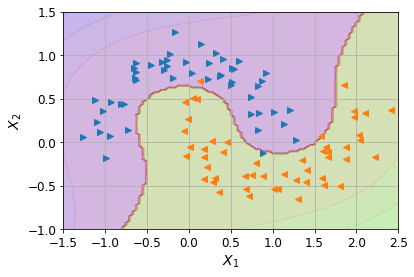

In [19]:
def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], ">")
    plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], "<")
    plt.xlabel("$X_1$")
    plt.ylabel("$X_2$")
    plt.axis(axes)
    plt.grid(True, which="both")


def plot_predictions(clf, axes):
    x0 = np.linspace(axes[0], axes[1], 100)
    x1 = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0, x1)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)


plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plot_predictions(poly_svm_clf, [-1.5, 2.5, -1, 1.5])
# X1_pred = np.linspace(-1.5,2.5,100).reshape(100,)
# X2_pred = np.linspace(-1.5,2.5,100).reshape(100,)
# xx = list(zip(X1_pred,X2_pred))
# y_pred = poly_svm_clf.predict(xx)
# y_pred


### 다항식커널

In [20]:
from sklearn.svm import SVC
poly_kernel_svm_clf = Pipeline([
    ("scaler",StandardScaler()),
    ("svm_clf",SVC(kernel="poly", degree=3, coef0=1, C=5)),
])
poly_kernel_svm_clf.fit(X,y)

poly_kernel_svm_clf100 = Pipeline([
    ("scaler",StandardScaler()),
    ("svm_clf",SVC(kernel="poly", degree=10, coef0=100, C=5)),
])
poly_kernel_svm_clf100.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=100, degree=10, kernel='poly'))])

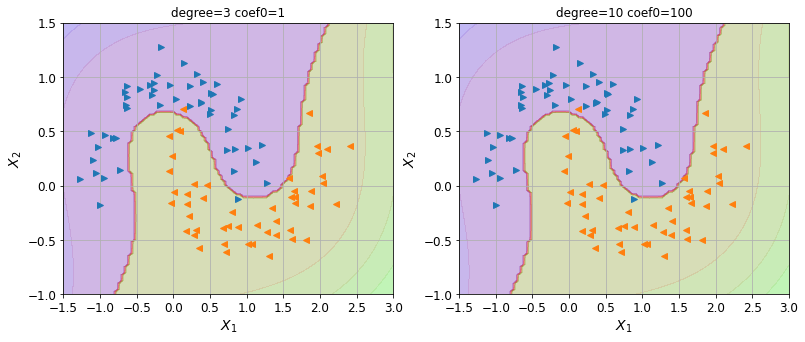

In [21]:
plt.figure(figsize=(13,5))
axes = [-1.5,3,-1,1.5]

plt.subplot(1,2,1)
plt.title("degree=3 coef0=1")
plot_dataset(X,y,axes)
plot_predictions(poly_kernel_svm_clf,axes)

plt.subplot(1,2,2)
plt.title("degree=10 coef0=100")
plot_dataset(X,y,axes)
plot_predictions(poly_kernel_svm_clf,axes)

In [22]:
rbf_kernel_svm_clf = Pipeline([
    ("scaler",StandardScaler()),
    ("svm_clf",SVC(kernel="rbf", gamma=5, C=0.001))
])
rbf_kernel_svm_clf.fit(X,y)

rbf_kernel_svm_clf2 = Pipeline([
    ("scaler",StandardScaler()),
    ("svm_clf",SVC(kernel="rbf", gamma=5, C=1000))
])
rbf_kernel_svm_clf2.fit(X,y)

rbf_kernel_svm_clf3 = Pipeline([
    ("scaler",StandardScaler()),
    ("svm_clf",SVC(kernel="rbf", gamma=0.1, C=0.001))
])
rbf_kernel_svm_clf3.fit(X,y)

rbf_kernel_svm_clf4 = Pipeline([
    ("scaler",StandardScaler()),
    ("svm_clf",SVC(kernel="rbf", gamma=0.1, C=1000))
])
rbf_kernel_svm_clf4.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=1000, gamma=0.1))])

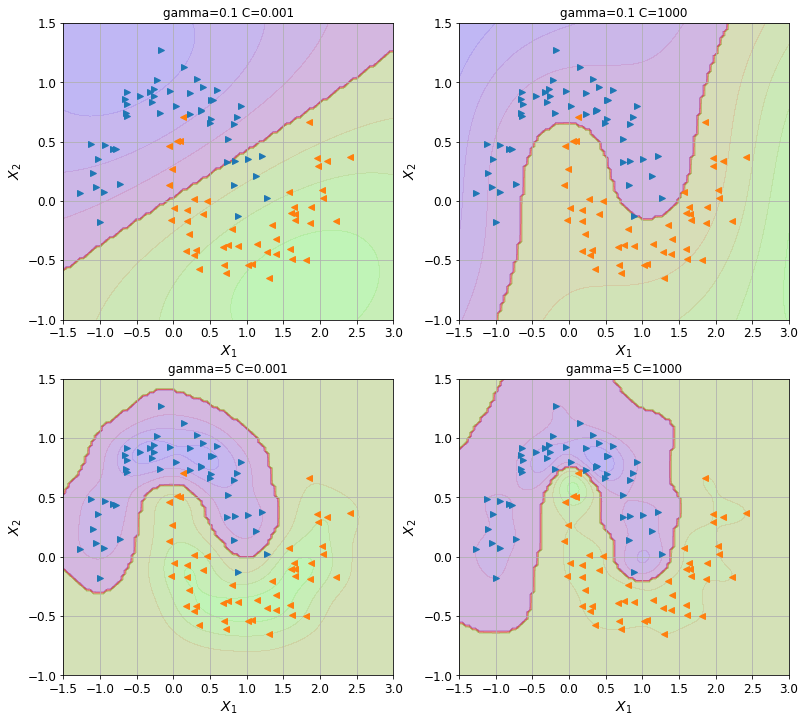

In [23]:
plt.figure(figsize=(13,12))
axes = [-1.5,3,-1,1.5]

plt.subplot(2,2,1)
plt.title("gamma=0.1 C=0.001")
plot_dataset(X,y,axes)
plot_predictions(rbf_kernel_svm_clf3,axes)

plt.subplot(2,2,2)
plt.title("gamma=0.1 C=1000")
plot_dataset(X,y,axes)
plot_predictions(rbf_kernel_svm_clf4,axes)

plt.subplot(2,2,3)
plt.title("gamma=5 C=0.001")
plot_dataset(X,y,axes)
plot_predictions(rbf_kernel_svm_clf,axes)

plt.subplot(2,2,4)
plt.title("gamma=5 C=1000")
plot_dataset(X,y,axes)
plot_predictions(rbf_kernel_svm_clf2,axes)


## svm회귀 polynomial

In [24]:
m = 100
X = 2*np.random.rand(m,1)-1
y = (0.2+0.1*X+0.5*X**2 + np.random.randn(m,1)/10).ravel()

In [27]:
# quadratic polynomial
from sklearn.svm import SVR
svm_poly_reg1 = SVR(kernel="poly", degree=2, C=100, epsilon=0.1, gamma="scale")
svm_poly_reg1.fit(X,y)
svm_poly_reg2 = SVR(kernel="poly", degree=2, C=0.01, epsilon=0.1, gamma="scale")
svm_poly_reg2.fit(X,y)

SVR(C=0.01, degree=2, kernel='poly')

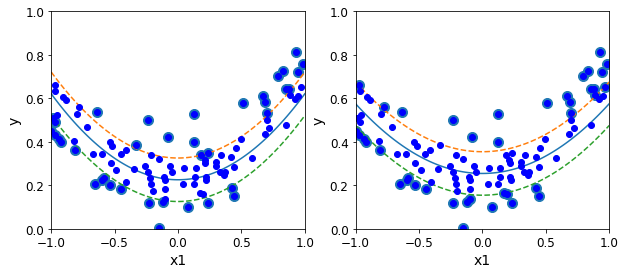

In [26]:
def plot_svm_regression(svm_reg, X, y, axes):
    x1 = np.linspace(axes[0], axes[1], 100).reshape(100, 1)
    y_pred = svm_reg.predict(x1)
    plt.plot(x1, y_pred)
    plt.plot(x1, y_pred + svm_reg.epsilon, "--")
    plt.plot(x1, y_pred - svm_reg.epsilon, "--")
    plt.scatter(X[svm_reg.support_],y[svm_reg.support_],s=100)
    plt.plot(X, y, "bo")
    plt.xlabel("x1")
    plt.ylabel("y")
    plt.axis(axes)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plot_svm_regression(svm_poly_reg1,X,y,[-1,1,0,1])
plt.subplot(1,2,2)
plot_svm_regression(svm_poly_reg2,X,y,[-1,1,0,1])